# Loading the training and test dataset

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()



# showing first 9 images

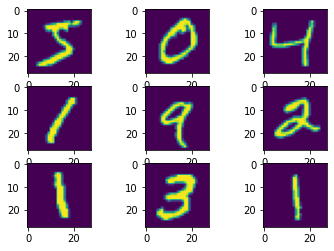

In [2]:

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_dataset_x[i])
plt.savefig('data.png')

# normalizing data

In [3]:
training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')
#Min-Max Scaler
training_dataset_x /= 255
test_dataset_x /= 255

# One-Hot Encoding our target variable

In [4]:
#One-Hot Encoding
from tensorflow.keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten 

model = Sequential()
#adding first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
#adding first pooling layer
model.add(MaxPooling2D(name='MaxPooling2D-1'))
# adding second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
#adding first pooling layer
model.add(MaxPooling2D(name='MaxPooling2D-2'))
#flatten the model for input to the  fully connected layers
model.add(Flatten())
# adding and specificing neurons and  hidden layers for fully connected layers
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
#adding output layers
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling2  (None, 13, 13, 32)       0         
 D)                                                              
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 11, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling2  (None, 5, 5, 64)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 Hidden-1 (Dense)            (None, 128)               2

# Training

In [6]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 27s 35ms/step - loss: 0.1967 - accuracy: 0.9384 - val_loss: 0.0636 - val_accuracy: 0.9810
Epoch 2/5
750/750 [==============================] - 26s 34ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0857 - val_accuracy: 0.9740
Epoch 3/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 4/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0410 - val_accuracy: 0.9882
Epoch 5/5
750/750 [==============================] - 51s 67ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0361 - val_accuracy: 0.9896
CPU times: user 5min 16s, sys: 44.1 s, total: 6min
Wall time: 2min 57s


# Evaluating on our test dataset

In [7]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.0295 - accuracy: 0.9902
loss = 0.029482552781701088, accuracy = 0.9901999831199646


# Visualization 

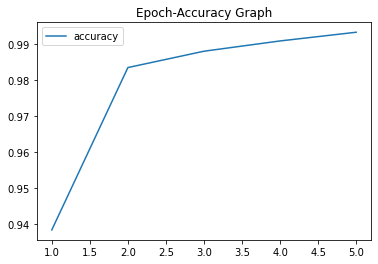

In [20]:

import matplotlib.pyplot as plt

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.legend(['accuracy'])

plt.savefig('validation.png')

In [28]:
print('training accuracy :',hist.history['accuracy'][4])
print('test accuracy :',accuracy)

training accuracy : 0.9933124780654907
test accuracy : 0.9901999831199646
